##### Problem1
##### Equivalence

What $\lambda$s should be used for exponential weighting to get results most similar to using windows of 2, 5, and 10 years, respectively?

I guesstimate that to make exponentially weighted averages comparable to windowed averages, we want the exponentially weighted ones to drop off to a certain level at the end of the window. If we want a weight of X at the end of a window of size N, we need to solve $\lambda^{N}$ = $X$. 

Experimenting with different values of X and comparing the exponentially weighted results to the windowed results indicate that X = 0.2 looks about right. Solving $\lambda^{N}$ = 0.2 for n = 252*2, n = 252*5 and n = 252*10 yields a lambda of 0.9968117641 for a 2-year window, 0.9987234838 for a 5-year window, and 0.9993615381 for a 10-year window.

##### Problem 2
#### Historical estimates with equivalent lambda

Repeat last week’s exponential weighting parameter estimation using the above computed $\lambda$ equivalent to 2 year, 5 year and 10 year windows. Compare the windowed versions to the corresponding equivalent exponentially weighted versions.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn;seaborn.set() 
from scipy.stats import norm 
from math import log
import scipy.stats as si

##### Import the two stock prices data: XOM and INTC

In [3]:
XOM = pd.read_csv("~/Desktop/XOM-bloomberg.csv", usecols = ['Dates','PX_LAST'])
XOM['Dates'] = pd.to_datetime(XOM.Dates).dt.date
XOM = XOM.set_index('Dates')
INTC = pd.read_csv("~/Desktop/INTC-bloomberg.csv", usecols = ['Dates','PX_LAST'])
INTC['Dates'] = pd.to_datetime(INTC.Dates).dt.date
INTC = INTC.set_index('Dates')

In [4]:
### exponential
def expo(price, time, weight):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.ewm(alpha = 1 - weight).std()/np.sqrt(time)
    mu = logreturn.ewm(alpha = 1 - weight).mean()/time + (vol**2)/2 
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    return para

lambda1=0.99682
lambda2=0.99872
lambda3=0.99936

expo1=expo(XOM,1/252,lambda1)
expo2=expo(XOM,1/252,lambda2)
expo3=expo(XOM,1/252,lambda3)
expo4=expo(INTC,1/252,lambda1)
expo5=expo(INTC,1/252,lambda2)
expo6=expo(INTC,1/252,lambda3)

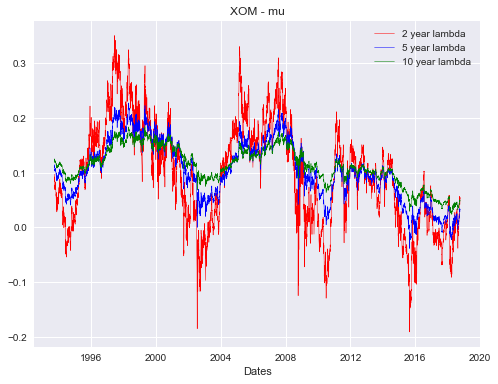

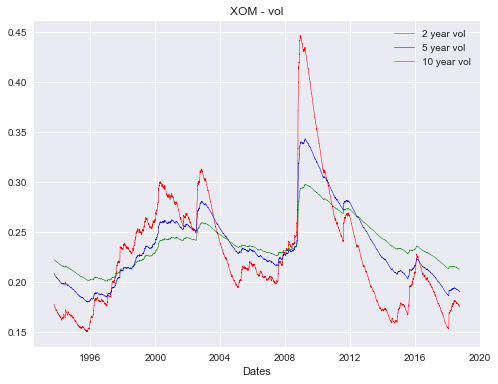

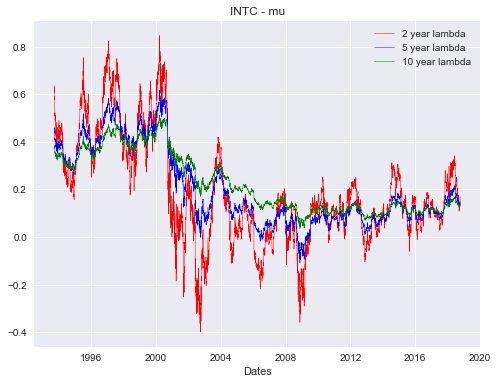

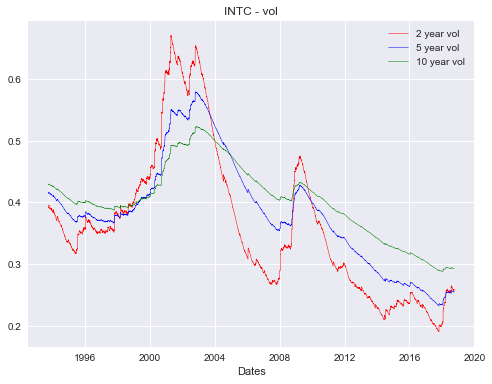

In [5]:
### XOM mu
fig,ax=plt.subplots(figsize=(8,6))
expo1.iloc[:,1].plot(color='red',linewidth=0.5,label='2 year lambda')
expo2.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year lambda')
expo3.iloc[:,1].plot(color='green',linewidth=0.5,label='10 year lambda')
plt.legend(loc='upper right')
plt.title('XOM - mu')
plt.show()
### XOM vol
fig,ax=plt.subplots(figsize=(8,6))
expo1.iloc[:,2].plot(color='red',linewidth=0.5,label='2 year vol')
expo2.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol')
expo3.iloc[:,2].plot(color='green',linewidth=0.5,label='10 year vol')
plt.legend(loc='upper right')
plt.title('XOM - vol')
plt.show()
### INTC mu
fig,ax=plt.subplots(figsize=(8,6))
expo4.iloc[:,1].plot(color='red',linewidth=0.5,label='2 year lambda')
expo5.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year lambda')
expo6.iloc[:,1].plot(color='green',linewidth=0.5,label='10 year lambda')
plt.legend(loc='upper right')
plt.title('INTC - mu')
plt.show()
### INTC vol
fig,ax=plt.subplots(figsize=(8,6))
expo4.iloc[:,2].plot(color='red',linewidth=0.5,label='2 year vol')
expo5.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol')
expo6.iloc[:,2].plot(color='green',linewidth=0.5,label='10 year vol')
plt.legend(loc='upper right')
plt.title('INTC - vol')
plt.show()

Compare of weighted and windowed results for same period. 

In [6]:
### windowed
def window(price, time, size):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    return para
mu2year = window(XOM,1/252,2*252)
mu5year = window(XOM,1/252,5*252)
mu10year = window(XOM,1/252,10*252)

mu2year1 = window(INTC,1/252,2*252)
mu5year1 = window(INTC,1/252,5*252)
mu10year1 = window(INTC,1/252,10*252)

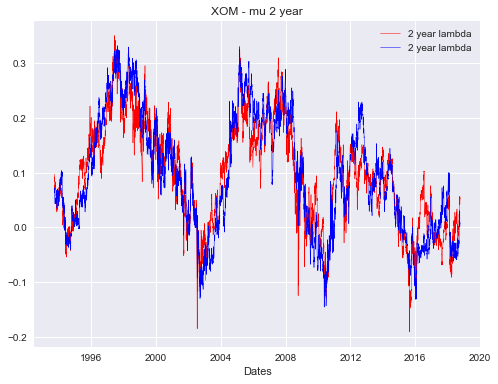

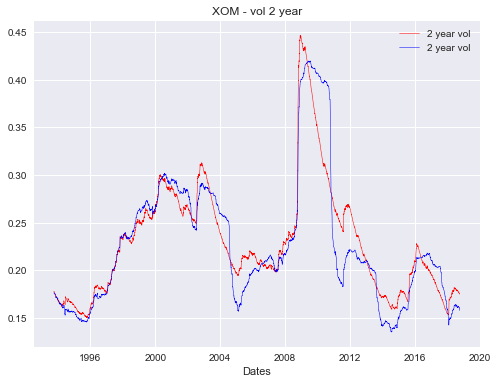

In [7]:
### XOM
### 2year windowed and 2year weighted
fig,ax=plt.subplots(figsize=(8,6))
expo1.iloc[:,1].plot(color='red',linewidth=0.5,label='2 year lambda')
mu2year.iloc[:,1].plot(color='blue',linewidth=0.5,label='2 year lambda')
plt.legend(loc='upper right')
plt.title('XOM - mu 2 year')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo1.iloc[:,2].plot(color='red',linewidth=0.5,label='2 year vol')
mu2year.iloc[:,2].plot(color='blue',linewidth=0.5,label='2 year vol')
plt.legend(loc='upper right')
plt.title('XOM - vol 2 year')
plt.show()

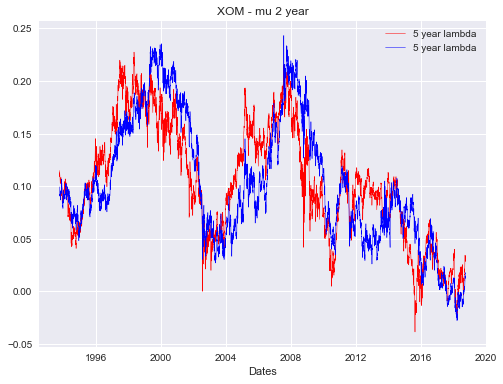

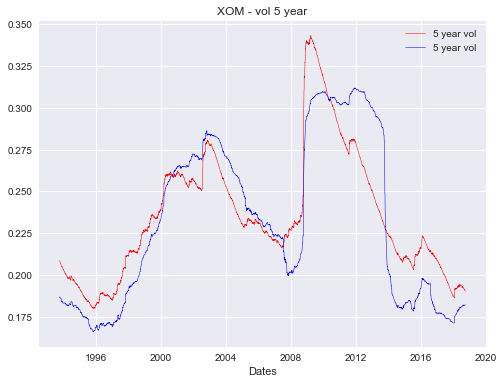

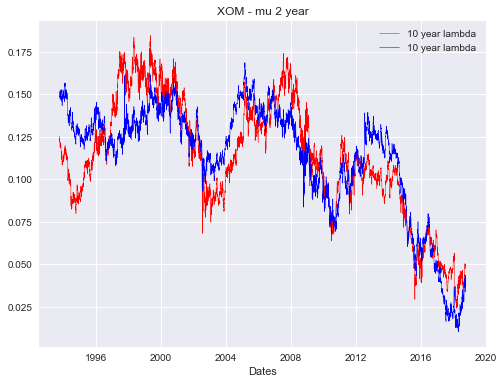

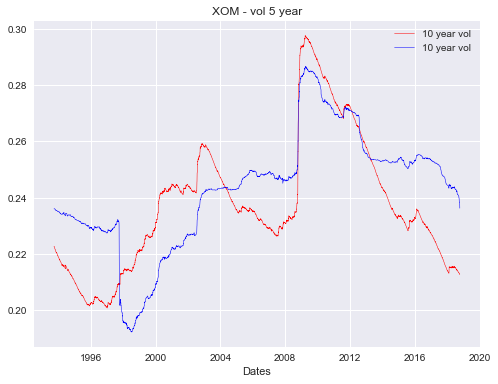

In [8]:
### 5year windowed and 5year weighted
fig,ax=plt.subplots(figsize=(8,6))
expo2.iloc[:,1].plot(color='red',linewidth=0.5,label='5 year lambda')
mu5year.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year lambda')
plt.legend(loc='upper right')
plt.title('XOM - mu 2 year')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo2.iloc[:,2].plot(color='red',linewidth=0.5,label='5 year vol')
mu5year.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol')
plt.legend(loc='upper right')
plt.title('XOM - vol 5 year')
plt.show()

### 10year windowed and 10year weighted
fig,ax=plt.subplots(figsize=(8,6))
expo3.iloc[:,1].plot(color='red',linewidth=0.5,label='10 year lambda')
mu10year.iloc[:,1].plot(color='blue',linewidth=0.5,label='10 year lambda')
plt.legend(loc='upper right')
plt.title('XOM - mu 2 year')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo3.iloc[:,2].plot(color='red',linewidth=0.5,label='10 year vol')
mu10year.iloc[:,2].plot(color='blue',linewidth=0.5,label='10 year vol')
plt.legend(loc='upper right')
plt.title('XOM - vol 5 year')
plt.show()

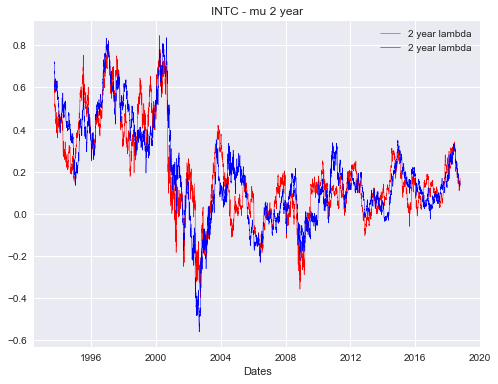

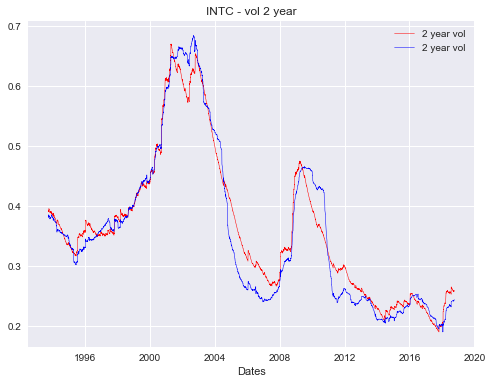

In [9]:
### INTC
### 2year windowed and 2year weighted
fig,ax=plt.subplots(figsize=(8,6))
expo4.iloc[:,1].plot(color='red',linewidth=0.5,label='2 year lambda')
mu2year1.iloc[:,1].plot(color='blue',linewidth=0.5,label='2 year lambda')
plt.legend(loc='upper right')
plt.title('INTC - mu 2 year')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo4.iloc[:,2].plot(color='red',linewidth=0.5,label='2 year vol')
mu2year1.iloc[:,2].plot(color='blue',linewidth=0.5,label='2 year vol')
plt.legend(loc='upper right')
plt.title('INTC - vol 2 year')
plt.show()

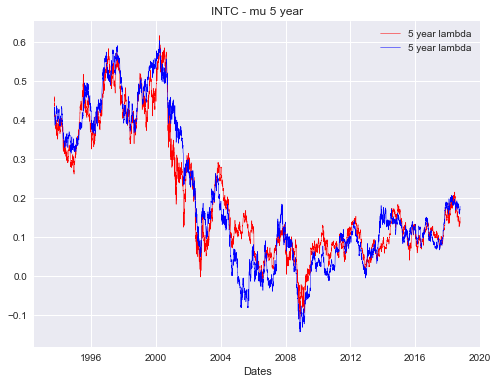

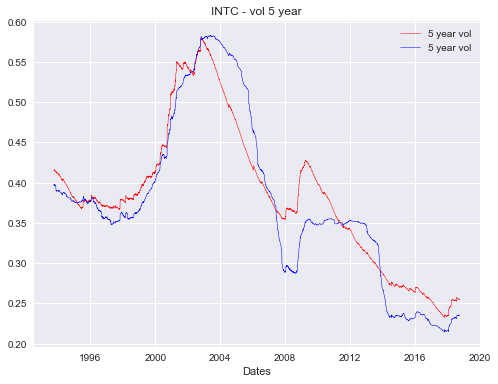

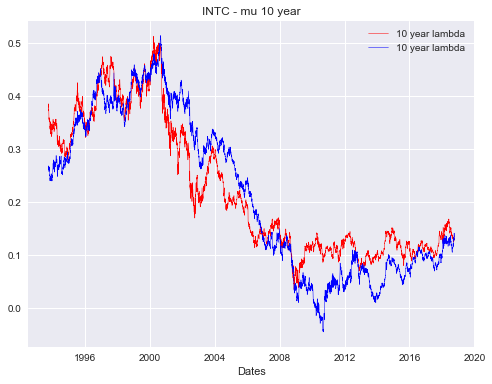

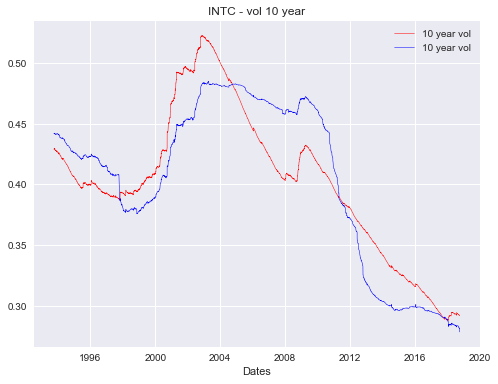

In [10]:

### 5year windowed and 5year weighted
fig,ax=plt.subplots(figsize=(8,6))
expo5.iloc[:,1].plot(color='red',linewidth=0.5,label='5 year lambda')
mu5year1.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year lambda')
plt.legend(loc='upper right')
plt.title('INTC - mu 5 year')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo5.iloc[:,2].plot(color='red',linewidth=0.5,label='5 year vol')
mu5year1.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol')
plt.legend(loc='upper right')
plt.title('INTC - vol 5 year')
plt.show()

### 10year windowed and 10year weighted
fig,ax=plt.subplots(figsize=(8,6))
expo6.iloc[:,1].plot(color='red',linewidth=0.5,label='10 year lambda')
mu10year1.iloc[:,1].plot(color='blue',linewidth=0.5,label='10 year lambda')
plt.legend(loc='upper right')
plt.title('INTC - mu 10 year')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo6.iloc[:,2].plot(color='red',linewidth=0.5,label='10 year vol')
mu10year1.iloc[:,2].plot(color='blue',linewidth=0.5,label='10 year vol')
plt.legend(loc='upper right')
plt.title('INTC - vol 10 year')
plt.show()

The estimates look similar to the windowed versions.
  
  The exponentially weighted versions appear to slide into new regimes, whereas the windowed versions tend to jump into new regimes.
  
  Exponentially weighted also slides into the new regime more quickly than the windowed versions.m

#### 3. Formula VaR and ES from historical estimates

Using the estimates for the drift and volatility from last week using $2 year$, $5 year$ and $10 year$ windows, and using the corresponding equivalent exponential weights from above, tabulate and graph the $VaR(S,T,p)$ and the $ES(S,T,p′)$ for S being E and L, using $p = 0.99$, $p′ = 0.975$, and $T = 5 days$ (i.e. one week), for each day over the last 20 years, or as far back as the above estimates were done. Tabulate and graph.

Unlike the parameter estimates, the computed VaRs and ESs will not be comparable between dates if you compute them on 1 share of stock. They can be normalized by either computing them assuming a $10,000 position each day, or converting them to relative losses.

1) VaR

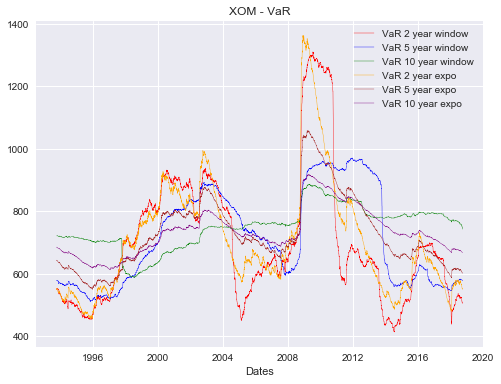

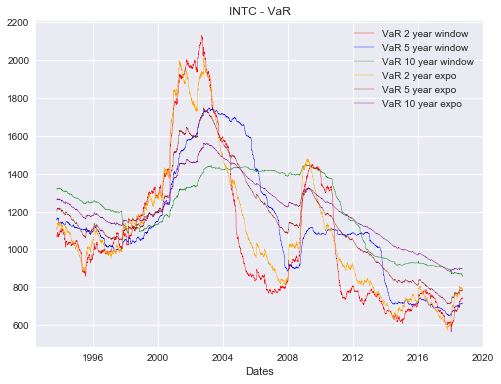

In [12]:
def VaR(S,t,p,mu,sigma):
    VaR=S-S*np.exp(sigma*np.sqrt(t)*si.norm(0,1).ppf(1-p)+(mu-(sigma**2)/2)*t)
    return VaR
### XOM
VaR2=VaR(10000,5/252,0.99,mu2year.iloc[:,1],mu2year.iloc[:,2])
VaR5=VaR(10000,5/252,0.99,mu5year.iloc[:,1],mu5year.iloc[:,2])
VaR10=VaR(10000,5/252,0.99,mu10year.iloc[:,1],mu10year.iloc[:,2])
VaRex2=VaR(10000,5/252,0.99,expo1.iloc[:,1],expo1.iloc[:,2])
VaRex5=VaR(10000,5/252,0.99,expo2.iloc[:,1],expo2.iloc[:,2])
VaRex10=VaR(10000,5/252,0.99,expo3.iloc[:,1],expo3.iloc[:,2])
fig,ax=plt.subplots(figsize=(8,6))
VaR2.plot(color = "red", linewidth = 0.4, label = "VaR 2 year window ")
VaR5.plot(color = "blue", linewidth = 0.4, label = "VaR 5 year window")
VaR10.plot(color = "green", linewidth = 0.4, label = "VaR 10 year window")
VaRex2.plot(color = "orange", linewidth = 0.4, label = "VaR 2 year expo")
VaRex5.plot(color = "brown", linewidth = 0.4, label = "VaR 5 year expo")
VaRex10.plot(color = "purple", linewidth = 0.4, label = "VaR 10 year expo")
plt.legend(loc='upper right')
plt.title('XOM - VaR')
plt.show()

### intc

VaR2=VaR(10000,5/252,0.99,mu2year1.iloc[:,1],mu2year1.iloc[:,2])
VaR5=VaR(10000,5/252,0.99,mu5year1.iloc[:,1],mu5year1.iloc[:,2])
VaR10=VaR(10000,5/252,0.99,mu10year1.iloc[:,1],mu10year1.iloc[:,2])
VaRex2=VaR(10000,5/252,0.99,expo4.iloc[:,1],expo4.iloc[:,2])
VaRex5=VaR(10000,5/252,0.99,expo5.iloc[:,1],expo5.iloc[:,2])
VaRex10=VaR(10000,5/252,0.99,expo6.iloc[:,1],expo6.iloc[:,2])
fig,ax=plt.subplots(figsize=(8,6))
VaR2.plot(color = "red", linewidth = 0.4, label = "VaR 2 year window ")
VaR5.plot(color = "blue", linewidth = 0.4, label = "VaR 5 year window")
VaR10.plot(color = "green", linewidth = 0.4, label = "VaR 10 year window")
VaRex2.plot(color = "orange", linewidth = 0.4, label = "VaR 2 year expo")
VaRex5.plot(color = "brown", linewidth = 0.4, label = "VaR 5 year expo")
VaRex10.plot(color = "purple", linewidth = 0.4, label = "VaR 10 year expo")
plt.legend(loc='upper right')
plt.title('INTC - VaR')
plt.show()

2) ES

In [15]:
def ES(S,T,p,mu,vol):
    es = S * (1 - np.exp(mu *T)/(1-p) * si.norm.cdf(si.norm.ppf(1-p) - T**(0.5)*vol))
    return(es)

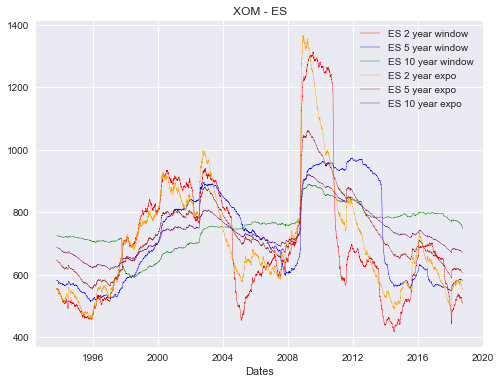

In [16]:
### XOM
ES2=ES(10000,5/252,0.975,mu2year.iloc[:,1],mu2year.iloc[:,2])
ES5=ES(10000,5/252,0.975,mu5year.iloc[:,1],mu5year.iloc[:,2])
ES10=ES(10000,5/252,0.975,mu10year.iloc[:,1],mu10year.iloc[:,2])
ESex2=ES(10000,5/252,0.975,expo1.iloc[:,1],expo1.iloc[:,2])
ESex5=ES(10000,5/252,0.975,expo2.iloc[:,1],expo2.iloc[:,2])
ESex10=ES(10000,5/252,0.975,expo3.iloc[:,1],expo3.iloc[:,2])

fig,ax=plt.subplots(figsize=(8,6))
ES2.plot(color = "red", linewidth = 0.4, label = "ES 2 year window ")
ES5.plot(color = "blue", linewidth = 0.4, label = "ES 5 year window")
ES10.plot(color = "green", linewidth = 0.4, label = "ES 10 year window")
ESex2.plot(color = "orange", linewidth = 0.4, label = "ES 2 year expo")
ESex5.plot(color = "brown", linewidth = 0.4, label = "ES 5 year expo")
ESex10.plot(color = "purple", linewidth = 0.4, label = "ES 10 year expo")
plt.legend(loc='upper right')
plt.title('XOM - ES')
plt.show()

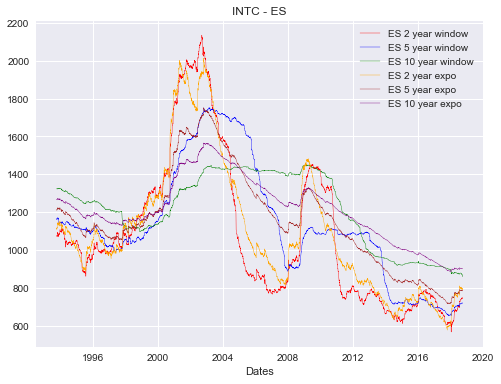

In [17]:
ES2=ES(10000,5/252,0.975,mu2year1.iloc[:,1],mu2year1.iloc[:,2])
ES5=ES(10000,5/252,0.975,mu5year1.iloc[:,1],mu5year1.iloc[:,2])
ES10=ES(10000,5/252,0.975,mu10year1.iloc[:,1],mu10year1.iloc[:,2])
ESex2=ES(10000,5/252,0.975,expo4.iloc[:,1],expo4.iloc[:,2])
ESex5=ES(10000,5/252,0.975,expo5.iloc[:,1],expo5.iloc[:,2])
ESex10=ES(10000,5/252,0.975,expo6.iloc[:,1],expo6.iloc[:,2])

fig,ax=plt.subplots(figsize=(8,6))
ES2.plot(color = "red", linewidth = 0.4, label = "ES 2 year window ")
ES5.plot(color = "blue", linewidth = 0.4, label = "ES 5 year window")
ES10.plot(color = "green", linewidth = 0.4, label = "ES 10 year window")
ESex2.plot(color = "orange", linewidth = 0.4, label = "ES 2 year expo")
ESex5.plot(color = "brown", linewidth = 0.4, label = "ES 5 year expo")
ESex10.plot(color = "purple", linewidth = 0.4, label = "ES 10 year expo")
plt.legend(loc='upper right')
plt.title('INTC - ES')
plt.show()

97.5% ES is virtually identical to 99% VaR.

Equivalent exponential weighting rolls in changes in vol faster than windowing does.

Exponential is also smoother, presumably because of the impact of still having some weight beyond the corresponding windows.

XOM VaR is higher than INTC VaR because its volatility is higher.

###### Problem 4

#### Derivative errors for normal CDF

Let $F(x)$ be a function, and let $f(x)$ be its derivative. Define the difference derivative of $F$ with a step size has

$$D(F,x,h) = (F(x+h)−F(x−h))/(2h)$$

and then

$$D(F,x,h)\approx f(x)$$

We often use the above to approximate $f$. 

The error at $x$ is then:

$$DErr(F,f,x,h)=f(x)−D(F,x,h)$$

The graph of $DErr(F,f,x,h)$ or even of $D(F,x,h)$ can be used to choose an optimal $h$ for computing the derivative and to illustrate the accuracy of $D(F,x,h)$.
Let $\varphi(x)$ be the normal distribution, and let $\phi (x)$ be the CDF of the standard normal
distribution. Then $$\varphi(x) = d\phi (x)/dx$$

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
h = 1;r = 0.1;length = 10
h_se =pd.Series([h * r ** (n - 1) for n in range(1, length + 1)])
x=pd.Series(np.arange(-5, 5, 0.05))

Text(0.5,1,'cdf')

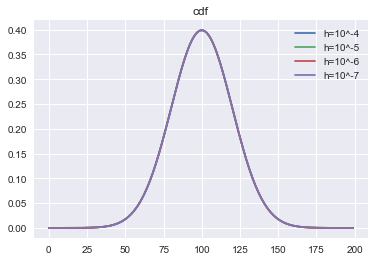

In [19]:
def pdf(x,h):
    xx=np.empty(len(x))
    for i in range(len(x)):
        xx[i]=(norm.cdf(x[i]+h)-norm.cdf(x[i]-h))/(2*h)
    return xx
xx1=pdf(x,h_se[0])
xx2=pdf(x,h_se[4])
xx3=pdf(x,h_se[5])
xx4=pdf(x,h_se[6])
xx5=pdf(x,h_se[7])
plt.plot(xx2,label='h=10^-4')
plt.plot(xx3,label='h=10^-5')
plt.plot(xx4,label='h=10^-6')
plt.plot(xx5,label='h=10^-7')
plt.legend()
plt.title('cdf')

Plotting the differences indicates that the best accuracy is given using $h = 10^{−5}$. Plotting the 2nd derivative approximations shows that the first derivative clearly deteriorates at $10^{−7}$.

Text(0.5,1,'phi(x)-D(phi(x),h)')

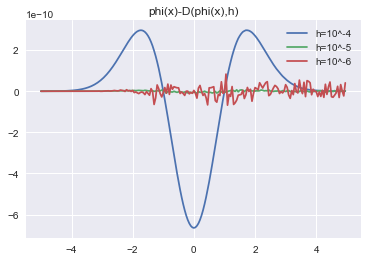

In [20]:
plt.plot(x,xx2-norm.pdf(x),label='h=10^-4')
plt.plot(x,xx3-norm.pdf(x),label='h=10^-5')
plt.plot(x,xx4-norm.pdf(x),label='h=10^-6')
plt.legend()
plt.title('phi(x)-D(phi(x),h)')

Text(0.5,1,'second derivatives')

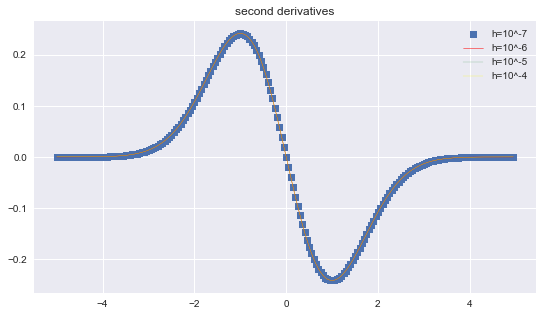

In [23]:
fig,ax=plt.subplots(figsize=(9,5))
def pdf1(x,h):
    xxx=np.empty(len(x))
    for i in range(len(x)):
        xxx[i]=(norm.pdf(x[i]+h)-norm.pdf(x[i]-h))/(2*h)
    return xxx
xx22=pdf1(x,h_se[4])
xx33=pdf1(x,h_se[5])
xx44=pdf1(x,h_se[6])
xx55=pdf1(x,h_se[7])
plt.plot(x,xx55,'s',label='h=10^-7')
plt.plot(x,xx44,'r',linewidth='0.5',label='h=10^-6')
plt.plot(x,xx33,linewidth='0.25',label='h=10^-5')
plt.plot(x,xx22,'yellow',linewidth='0.25',label='h=10^-4')

plt.legend()
plt.title('second derivatives')

##### Problem 5

##### Black Scholes delta error

Repeat the previous problem using the Black-Scholes formula for the price of a call option maturing in 1 year with a strike of 100. Use an implied volatility of 30% and a risk free rate of 0.04%.
Plot the BS price and the delta itself as well to make sure your calculations make sense.

In [24]:
import sympy as sy
import scipy.stats as si
def euro_vanilla_call(S):
    d1 = (np.log(S / 100) + (0.04/100 + 0.5 * 0.3 ** 2) * 1) / (0.3 * np.sqrt(1))
    d2 = (np.log(S / 100) + (0.04/100 - 0.5 * 0.3 ** 2) * 1) / (0.3 * np.sqrt(1))
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - 100 * np.exp(-0.04/100 ) * si.norm.cdf(d2, 0.0, 1.0))
    return call
def delta(S):
    d1 = (np.log(S / 100) + (0.04/100 + 0.5 * 0.3 ** 2) * 1) / (0.3 * np.sqrt(1))
    delta = si.norm.cdf(d1, 0.0, 1.0)
    return(delta)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


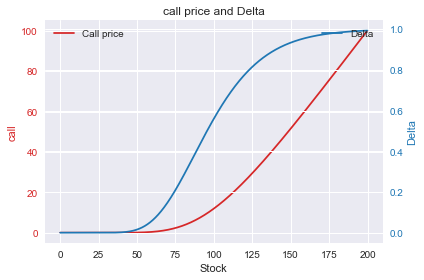

In [25]:
S=pd.Series(np.arange(0, 200, 0.1))
Price=pd.Series(euro_vanilla_call(S))
Delta=delta(S)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Stock')
ax1.set_ylabel('call', color=color)
ax1.plot(S, Price, color=color,label='Call price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Delta', color=color)  # we already handled the x-label with ax1
ax2.plot(S, Delta, color=color,label='Delta')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('call price and Delta')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [26]:
def pdfs(S,h):
    ss=np.empty(len(S))
    for i in range(len(S)):
        ss[i]=(euro_vanilla_call(S[i]+h)-euro_vanilla_call(S[i]-h))/(2*h)
    return ss

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Text(0.5,1,'Derivatives and Delta')

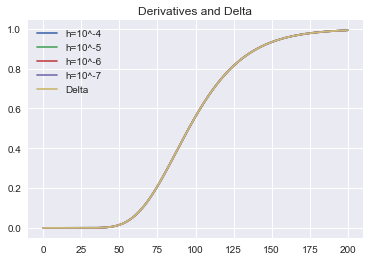

In [27]:
ss2=pdfs(S,h_se[4])
ss3=pdfs(S,h_se[5])
ss4=pdfs(S,h_se[6])
ss5=pdfs(S,h_se[7])
plt.plot(S,ss2,label='h=10^-4')
plt.plot(S,ss3,label='h=10^-5')
plt.plot(S,ss4,label='h=10^-6')
plt.plot(S,ss5,label='h=10^-7')
plt.plot(S,Delta,label='Delta')
plt.legend()
plt.title('Derivatives and Delta')

Text(0.5,1,'error between derivatives and Delta')

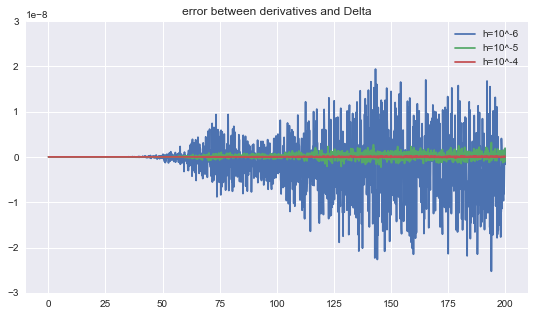

In [28]:
fig,ax=plt.subplots(figsize=(9,5))
plt.plot(S,ss4-Delta,label='h=10^-6')
plt.plot(S,ss3-Delta,label='h=10^-5')
plt.plot(S,ss2-Delta,label='h=10^-4')
plt.legend()
plt.ylim(-3e-8,3e-8)
plt.title('error between derivatives and Delta')

In any case, the error isn’t visible on the graphs of the difference derivatives, but when we compare to the actual delta, we see that the best accuracy is gotten around $h = 5 × 10^{−4}$, although $h = 10^{−3}$ does better for heavily in the money options. We also see that $h = 10^{−3}$ suffers from curvature error whereas $h = 10^{−4}$ does not, but is much noisier and $h = 5 × 10^{−4}$ is a little noisier than the larger step size and but has less curvature error.

The noise starts showing up here at a much larger step size than it did in the previous problem, indicating that the formula for the option price has less accuracy than the normal CDF calculation, which is as expected, but it is interesting to see how large the difference is.

By computing prices, deltas, and difference derivatives of the option price as a function of the stock price, we can see that the error isn’t visible on the graphs and best accuracy is gotten at the level of $h = 10^{−4}$,we cao also see that the $h = 10^{−5}$ suffers from curvature error